In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(999)

In [2]:

#we will load the wine data from scikit - learn package
from sklearn . datasets import load_wine
wine=load_wine()
# check the shape of wine data
print (wine. data . shape )
A = wine.data
# check the shape  of target
print ( wine.target.shape )

#How many labels does wine data have ?
#Number of labels
C= np.unique(wine.target)
print('labels;',C)
print ('Number of lablels:',len(C))
n = wine. data . shape [0] # Number of data points
d = wine. data . shape [1] # Dimension of data points
#In the following code , we create a nx1 vector of target labels
y = 1.0* np . ones ([ A.shape[0] ,])

for i in range ( wine.target.shape[0]) :
  if wine.target[i] != 1:
    y[i]=-1
  else:
    y[i]=1
print(y)
print(len(y))
#Normalization of columns of A
for j in range (A.shape[1]) :
  a=abs(( A[: , j ]))
  A [: , j ] = A[: , j ]/ max(a)
print(A)
# Create an index array
indexarr = np.arange ( n ) # index array

np.random.shuffle(indexarr) # shuffle the indices

# check indexarr after shuffling
print('index_array:',indexarr)
B=[[] for _ in range(A.shape[0])]
Y=1.0* np . ones ([ A . shape [0] ,])
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
for i in range(A.shape[0]):
  j=indexarr[i]
  B[i]=A[j].tolist()
  Y[i]=y[j]


per=int(0.8*len(B))
print(per)

train_data=np.array(B[:per])
test_data=np.array(B[per:])
train_label=Y[:per]
test_label=Y[per:]
print(f'train_data: {train_data.shape}')
print(f'train_label: {train_label.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_label: {test_label.shape}')

(178, 13)
(178,)
labels; [0 1 2]
Number of lablels: 3
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
178
[[0.95954147 0.29482759 0.75232198 ... 0.60818713 0.98       0.63392857]
 [0.89008766 0.30689655 0.6625387  ... 0.61403509 0.85       0.625     ]
 [0.88739042 0.40689655 0.82662539 ... 0.60233918 0.7925     0.70535714]


In [3]:
def predict(w,x):
  predict=[]
  for i in range(x.shape[0]):
    wx=w@x[i]
    a=(np.sign(wx))
    if a>=0:# assumption: we assume for 0 it is 1 its depend on us that for which value we are biased
      predict.append(1)
    else:
      predict.append(-1)
  return predict
def compute_accuracy(data,labels,model_w):
  predicted_value=predict(model_w,data)
  count_true=0
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy


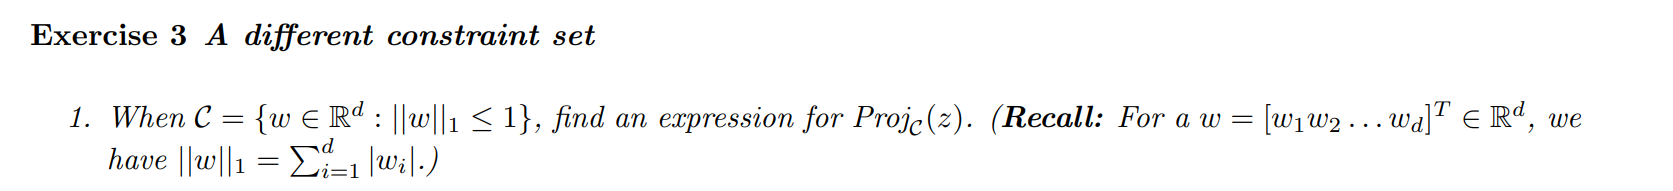


The projection of a vector $z$ onto the set $C$, denoted as $\text{Proj}_C(z)$, is the point in $C$ that is closest to $z$ in terms of Euclidean distance. In this case, $C$ is defined as the set of vectors in $\mathbb{R}^d$ such that $||w||_1 \leq 1$, where $||w||_1$ denotes the $L^1$ norm of $w$.

The problem can be formulated as an optimization problem:

$ \text{minimize } ||\text{Proj}_C(z) - z||_2^2 $

subject to $||\text{Proj}_C(z)||_1 \leq 1$.

To find $\text{Proj}_C(z)$, we can solve this optimization problem.

The Lagrangian for this optimization problem is:

$ L(w, \lambda) = ||w - z||_2^2 + \lambda(||w||_1 - 1) $

To find the projection, we differentiate $L$ with respect to $w$ and $\lambda$, and set the derivatives to zero:


  Differentiate with respect to $w$:

  $ \frac{\partial L}{\partial w} = 2(w - z) + \lambda \frac{\partial}{\partial w}||w||_1 $

  The partial derivative of the $L^1$ norm $||w||_1$ with respect to $w$ is the subgradient of $||w||_1$, which is given by:

  $ \text{sgn}(w) = \left[ \text{sgn}(w_1), \text{sgn}(w_2), ..., \text{sgn}(w_d) \right] $

  where $\text{sgn}(x)$ is the sign function, which returns $-1$ for negative $x$, $0$ for $x = 0$, and $1$ for positive $x$.
  
  Differentiate with respect to $\lambda$:

  $ \frac{\partial L}{\partial \lambda} = ||w||_1 - 1 $


Setting these derivatives to zero gives us the following equations:


  $2(w - z) + \lambda \text{sgn}(w) = 0$
  $||w||_1 = 1$


We need to solve these equations to find $\text{Proj}_C(z)$. However, solving this explicitly may be challenging due to the absolute value function in the $L^1$ norm.

In practice, one can use optimization algorithms such as projected gradient descent or interior point methods to solve this problem numerically. These methods will iteratively update the solution until convergence to find $\text{Proj}_C(z)$.




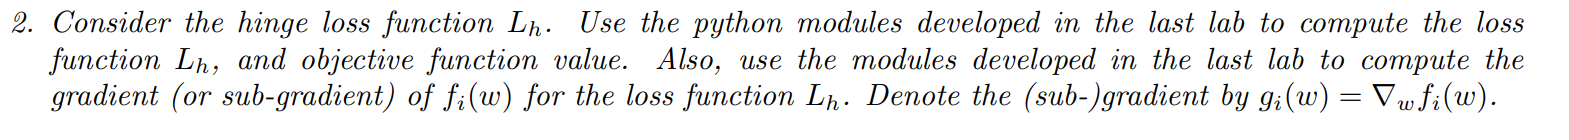

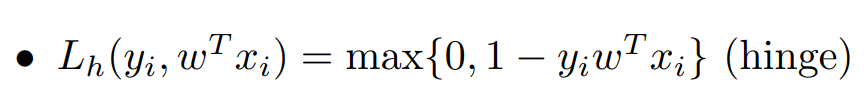

To rewrite the optimization problem
$
\min_{w \in \mathbb{R}^d}
 f(w) = \frac{\lambda}{2} ||w||_2^2 + \frac{1}{n} \sum_{i=1}^{n} L(y_i, w^T x_i)
$
as
$
\min_{w} \sum_{i=1}^{n} f_i(w)
$

Find an appropriate choice of $f_i(w)$, where

$
f_i(w) = \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i)/n
$

Here, $L(y_i, w^T x_i)$ is the loss function applied to the $i$-th data point. The summation over $i$ will then represent the average loss over the entire dataset. Therefore, the optimization problem becomes
$
\min_{w} \sum_{i=1}^{n} f_i(w) = \min_{w} \sum_{i=1}^{n} \left( \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i) /n\right)
$


This form allows us to treat each individual data point's loss term separately, which can be useful for certain optimization algorithms.


To compute the gradient of $ f_i(w) $ for the hinge loss function $ L_h(y_i, w^T x_i) $, let's first find the derivative of $ L_h $ with respect to $ w^T x_i $, denoted as $ L'_h $:

$L'_h(y_i, w^T x_i) = \frac{\partial L_h}{\partial (w^T x_i)} = \begin{cases} -y_i & \text{if } 1 - y_i w^T x_i > 0 \\ 0 & \text{otherwise} \end{cases} $

Now, let's compute the gradient of $ f_i(w) $ with respect to $ w $, denoted as $ g_i(w) $:

$g_i(w) = \frac{\partial f_i/}{\partial w} =\lambda/n \cdot( w )+ L'_h(y_i, w^T x_i) \cdot x_i/n $


In [4]:
def hinge(x,y,w):
  hinge= np.maximum(0,1-y*(w@x))
  return hinge
def compute_objective(X,y,w,lamda):
  n=X.shape[0]
  loss=0
  for i in range(n):
    x_i=X[i]
    y_i=y[i]
    margin = hinge(x_i,y_i,w)
    if margin > 0:

        loss=loss+margin
  reg_term=(lamda/2)*((np.linalg.norm(w))**2)
  obj_value=reg_term+loss/n
  return obj_value
def compute_gradient_hinge_loss(x_i, y_i, w, lambda_val,n):

    margin = 1 - y_i *( w@x_i)
    if margin >= 0:
        loss_gradient = -y_i*x_i
    else:
        loss_gradient = 0
    regularization_gradient = (1/n)*lambda_val * w
    gradient = regularization_gradient + loss_gradient/n
    return gradient

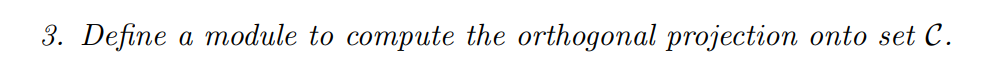

Finding projection with the help of primal and dual optimization problem . (using provided reference )

In [5]:
def primal_fn(x, a):
    return 0.5 * np.sum((x - a) ** 2)

# Vectorize the computation of s_i(x, gamma)
def s(x, gamma, a):
    return 0.5 * (x - a) ** 2 + gamma * np.abs(x)

def x_gamma(gamma, a):
    sol = np.zeros_like(a)
    idx = a > gamma
    sol[idx] = a[idx] - gamma
    idx = a < - gamma
    sol[idx] = a[idx] + gamma
    return sol

def dual_fn(gamma, kappa, a):
    x = x_gamma(gamma, a)
    return - kappa * gamma + np.sum(s(x, gamma, a))

def dual_grad(gamma, kappa, a):
    return - kappa + np.sum(np.maximum(np.abs(a) - gamma, 0))

In [6]:
def bisection(a, kappa, eps=1e-5):
    gamma_min, gamma_max = 0, (1 / (2 * kappa)) * np.sum(a ** 2)
    gamma=0
    # Run until gamma_max and gamma_min are the same
    while gamma_max - gamma_min > eps:
        gamma = (gamma_max + gamma_min) / 2
        grad = dual_grad(gamma, kappa, a)
        if grad < 0:
            gamma_max = gamma
        else:
            gamma_min = gamma
    #print('yehle gamaa',gamma)
    return gamma

In [7]:
# Point to be projected
a = np.array([1.1, 1.2])
# Radius of the ell_1 norm ball
kappa = 1
# Find approximate solution to the dual problem
dual_solution = bisection(a, kappa, eps=1e-5)
# Convert to the primal solution
primal_solution = x_gamma(dual_solution, a)
print(primal_solution)
print(dual_solution)

[0.44999971 0.54999971]
0.6500002861022951


In [8]:
def projec(u):
  gamma=bisection(u,kappa,eps=1e-5)

  primal=x_gamma(gamma,u)
  return primal

PRojection of vector in feasible region directly by using absolute sum value.

In [9]:
# def projec(u):
#   sum_value=sum(abs(u))
#   if sum_value>1:
#     new_u=u/sum_value
#   else:
#     new_u=u
#   return new_u

In [10]:

u=np.array([-0.5, 1.2, -0.7])
projec(u)

array([-0.03332878,  0.73332878, -0.23332878])

In [11]:
# def projection_C(z, max_iter=1000, lr=0.01, tol=1e-5):
#     w = np.zeros_like(z)  # Initialize w to zeros or any other suitable value
#     for _ in range(max_iter):
#         w_prev = w.copy()  # Store previous value of w for convergence check
#         gradient = 2 * (w - z) + np.sign(w)  # Compute gradient
#         w -= lr * gradient  # Update w using gradient descent
#         w = np.clip(w, -1, 1)  # Project w onto the feasible set C
#         # Check for convergence
#         if np.linalg.norm(w - w_prev) < tol:
#             break
#     return w

# # Example usage:
# z = np.array([0.5, 0.3, -0.7])  # Input vector z
# proj_z = projection_C(z)  # Projection of z onto set C
# print("Projection of z onto set C:", proj_z)

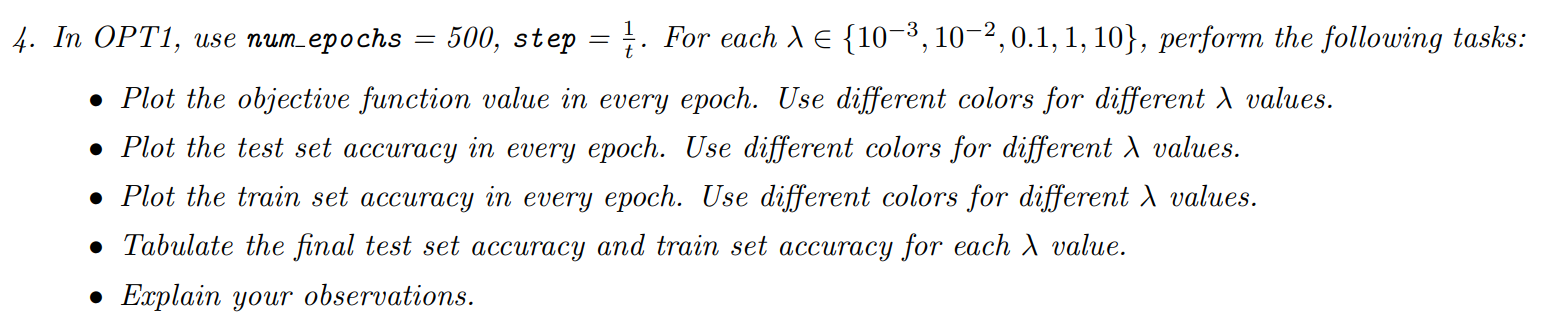

In [12]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  kappa=1
  eps=1e-5
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()# initial value list of ones which is out of our set(feasible set)
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*compute_gradient_hinge_loss(X[i], y[i], w, lamda,n)

      w=projec(w)
      #print(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(compute_objective(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

[1.1085503263546406, 1.1057275433047347, 1.1034877153069111, 1.101512232624434, 1.0997023811182323, 1.0980078003636207, 1.0964011423741125, 1.094874674832364, 1.0934130185052737, 1.0920106730903565, 1.090658059301144, 1.0888242427662893, 1.0864863656934052, 1.0842675664536268, 1.082159088930218, 1.0801526038605855, 1.0782400511840837, 1.076415398475728, 1.0746722092974608, 1.0730048338864637, 1.0714083925395195, 1.0698783363731106, 1.0684106364931452, 1.0670012986313757, 1.0656468860814277, 1.0643441594767342, 1.0630901959312844, 1.061004767203927, 1.0588293400608981, 1.0567962948524379, 1.0548916919195739, 1.053104134555132, 1.0514230403665856, 1.0498387714569561, 1.0483434798240832, 1.0469297289780644, 1.0455911297035065, 1.0443214477783516, 1.0426026388677518, 1.0404504759227, 1.0384907074706076, 1.0366984140302173, 1.0350534701572798, 1.0335376166230659, 1.0321361901477075, 1.0308366104814342, 1.0292342295426429, 1.0271347866001632, 1.0252883941810953, 1.0236514564930153, 1.0221900

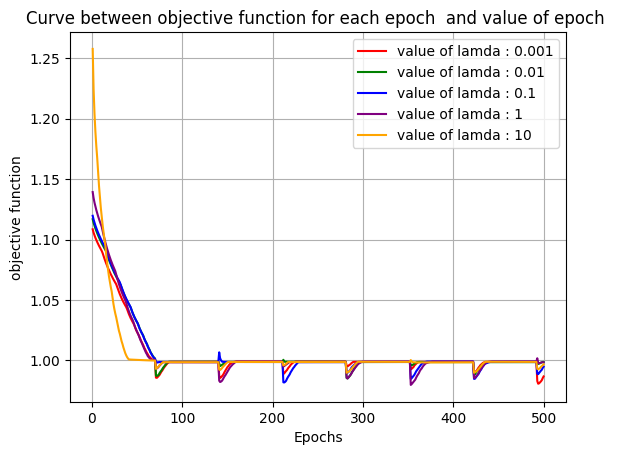

In [13]:
import matplotlib.pyplot as plt
data= train_data
y=train_label
# print(y)
num_echos=500
lamda1=OPT1(data,y,0.001,num_echos)[1]
lamda2=OPT1(data,y,0.01,num_echos)[1]
lamda3=OPT1(data,y,0.1,num_echos)[1]
lamda4=OPT1(data,y,1,num_echos)[1]
lamda5=OPT1(data,y,10,num_echos)[1]
print(lamda1)
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('objective function')
plt.title('Curve between objective function for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

The provided `OPT1` function implements an optimization algorithm using stochastic gradient descent (SGD) to minimize the objective function, which consists of the hinge loss and a regularization term. Through a series of epochs, the function iterates over the training data, updating the weight vector based on the computed gradient of the hinge loss function for each data point. The use of an adaptive learning rate, inversely proportional to the iteration count, aids in stabilizing the optimization process and adjusting the step size as training progresses. Shuffling the data points at each epoch prevents the model from overfitting to the order of the data, promoting better generalization. Tracking the objective function and accuracy on both the training and test datasets provides valuable insights into the convergence behavior and generalization performance of the model. Furthermore, the function's flexibility allows for experimentation with different regularization parameters and optimization strategies, making it suitable for fine-tuning

Observations:

Effect of Regularization on Objective Function Value: As λ increases, the objective function value might decrease because higher regularization penalizes larger weights, leading to a simpler model.
Conversely, for smaller λ values, the objective function value might increase as the model might overfit the training data. As it has been observed that for $\lambda$ = 10, the objective function value is decreasing rapidly.


Higher λ values may result in lower train set accuracy but better generalization, leading to higher test set accuracy. This indicates better performance on unseen data.

Convergence Speed: Higher λ values might lead to faster convergence as the model avoids fitting to noise in the data. Conversely, smaller λ values might lead to slower convergence or even oscillation around the optimal solution, especially if the data is noisy or the model is complex.
 Sensitivity to Learning Rate (η): The choice of learning rate (η) is crucial. Too small a learning rate might result in slow convergence, while too large a learning rate might cause the optimization process to diverge. for which we have taken η to be 1/t.

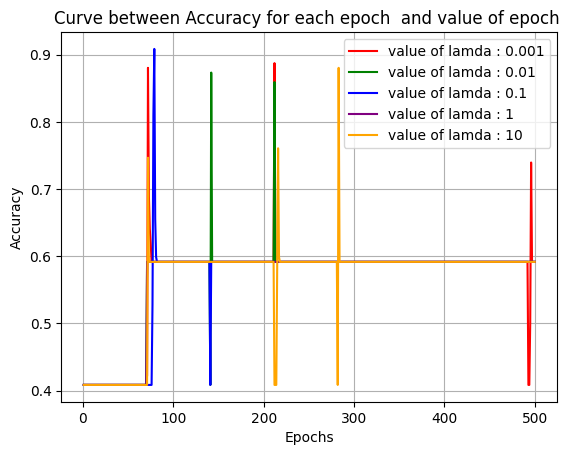

In [14]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3]
lamda2=OPT1(data,y,0.01,num_echos)[3]
lamda3=OPT1(data,y,0.1,num_echos)[3]
lamda4=OPT1(data,y,1,num_echos)[3]
lamda5=OPT1(data,y,10,num_echos)[3]
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


IN this method we got very well accuracy on training data for all values of lambdas for some epochs ,the curve claearly represents that for some values of epoch we got accuracy greater than 90%.

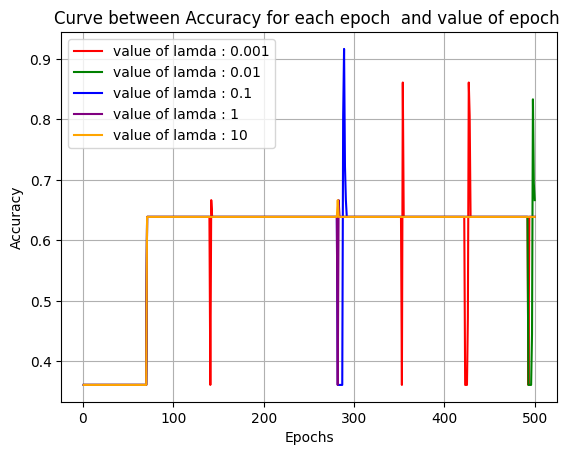

In [15]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4]
lamda2=OPT1(data,y,0.01,num_echos)[4]
lamda3=OPT1(data,y,0.1,num_echos)[4]
lamda4=OPT1(data,y,1,num_echos)[4]
lamda5=OPT1(data,y,10,num_echos)[4]
plt.plot([i for i in range(1,501)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,501)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,501)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,501)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,501)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

From curve it is observed that we got high accuracy for all lambdas except lambda=10 and hishest accuracy corresponds to lamda =0.1

In [16]:

from prettytable import PrettyTable
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3][-1]
lamda2=OPT1(data,y,0.01,num_echos)[3][-1]
lamda3=OPT1(data,y,0.1,num_echos)[3][-1]
lamda4=OPT1(data,y,1,num_echos)[3][-1]
lamda5=OPT1(data,y,10,num_echos)[3][-1]
accuracy_train=[]
accuracy_train.extend([lamda1,lamda2,lamda3,lamda4,lamda5])
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4][-1]
lamda2=OPT1(data,y,0.01,num_echos)[4][-1]
lamda3=OPT1(data,y,0.1,num_echos)[4][-1]
lamda4=OPT1(data,y,1,num_echos)[4][-1]
lamda5=OPT1(data,y,10,num_echos)[4][-1]
accuracy_test=[]
accuracy_test.extend([lamda1,lamda2,lamda3,lamda4,lamda5])
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',accuracy_train[0],accuracy_test[0]])
table.add_row(['0.01',accuracy_train[1],accuracy_test[1]])
table.add_row(['0.1',accuracy_train[2],accuracy_test[2]])
table.add_row(['1',accuracy_train[3],accuracy_test[3]])
table.add_row(['10',accuracy_train[4],accuracy_test[4]])
print(table)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.5915492957746479 | 0.6388888888888888 |
|      0.01     | 0.5915492957746479 | 0.6388888888888888 |
|      0.1      | 0.5915492957746479 | 0.6388888888888888 |
|       1       | 0.5915492957746479 | 0.6388888888888888 |
|       10      | 0.5915492957746479 | 0.6388888888888888 |
+---------------+--------------------+--------------------+


THe final values for each lamdas remain same but their is in between we got different highest values for exp: for lamda-0.1 wew got highest accuracy .

By visualisation of graph we can see that the accuracy for training data increases and decreases for different values of epochs , From graphs it is seen that it is not necessary that for large epoch we get high accuracy , their is no fix epoch for a particular lamda where we got maximum accuracy but for some lamdas it is converging to a particular lambda and from table we cannot say that the  final value is maximum value because in between their is some values which is greater than final therefore irregularties in graph is observed here we got maximum accuracy for lambda 0.1 in both test and training data set.So here we can conclude that as we increse lambdas accuracy increases it is not necesaary but in previous case we say that as lamda increases accuracy increasaes somewhar  which we can clearly see form comparing curves.
#Note: ##
 It is not necessary that every time we got same accuracy value because we are using stochastic  gradient descent in which we randomly choose coordinates and updated them therefore when runing multiple times we are getting different results thats why we are getting different curves every time .

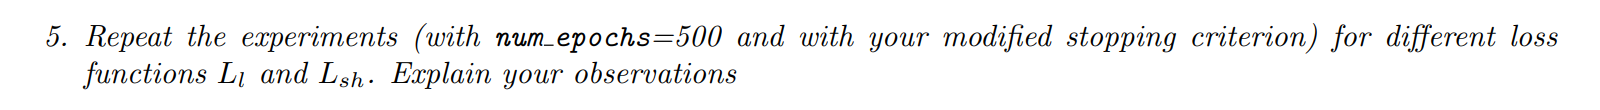

#Logistic Loss:

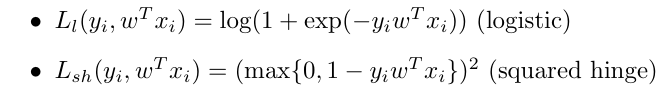

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


In [17]:
#Logistic
def logistic_loss(x,y,w):
  loss=np.log(1+np.exp(-y*(w@x)))
  return loss
def logistic_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+logistic_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj


In [18]:
#squared hinge
def squared_loss(x,y,w):
  z=y*(w@x)
  loss= max(0,1-z)
  return loss**2
def squared_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+squared_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [19]:
def logistic_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  loss_term=(1/n)*y*x*(1/(1+np.exp(y*(w@x))))
  return reg_term-loss_term
def squared_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  z=y*(w@x)
  grad=0
  if (1-z)>0:
    grad=-2*(1-z)*y*x
  gradient=reg_term+grad/n
  return gradient

In [20]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()# here intial value is list of ones
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*logistic_gradient(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(logistic_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [32]:
#Test data
data=test_data
y_label=test_label
lamda=.1 #maximum accuracy for training and test data we can also choose 10
num_epochs=500

In [33]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 70
..........................................................................
best_val_accuracy: 0.6666666666666666
epoch is: 282
..........................................................................
best_val_accuracy: 0.7222222222222222
epoch is: 283
..........................................................................
overall best value of accuracy: 0.7222222222222222


In [38]:
#Train data
data=train_data
y_label=train_label
lamda=.1 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.45774647887323944
epoch is: 49
..........................................................................
best_val_accuracy: 0.5211267605633803
epoch is: 50
..........................................................................
best_val_accuracy: 0.6056338028169014
epoch is: 51
..........................................................................
best_val_accuracy: 0.6126760563380281
epoch is: 52
..........................................................................
best_val_accuracy: 0.6408450704225352
epoch is: 61
..........................................................................
best_val_accuracy: 0.9014084507042254
epoch is: 283
..........................................................................
best_val_accuracy: 0.9295774647887324
epoch is: 495
.................................................................

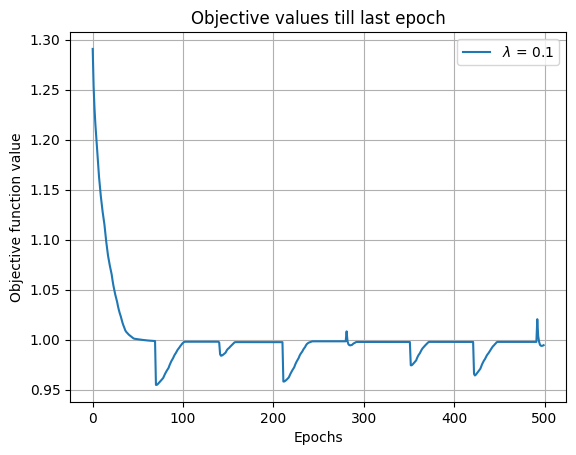

In [39]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

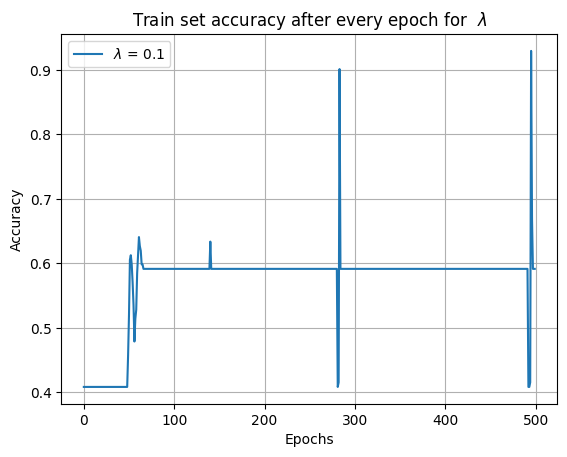

In [40]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
#Test data
data=test_data
y_label=test_label
lamda=.1 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.3888888888888889
epoch is: 51
..........................................................................
best_val_accuracy: 0.4166666666666667
epoch is: 52
..........................................................................
best_val_accuracy: 0.4444444444444444
epoch is: 53
..........................................................................
best_val_accuracy: 0.5277777777777778
epoch is: 54
..........................................................................
best_val_accuracy: 0.5833333333333334
epoch is: 55
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 59
..........................................................................
best_val_accuracy: 0.6944444444444444
epoch is: 61
....................................................................

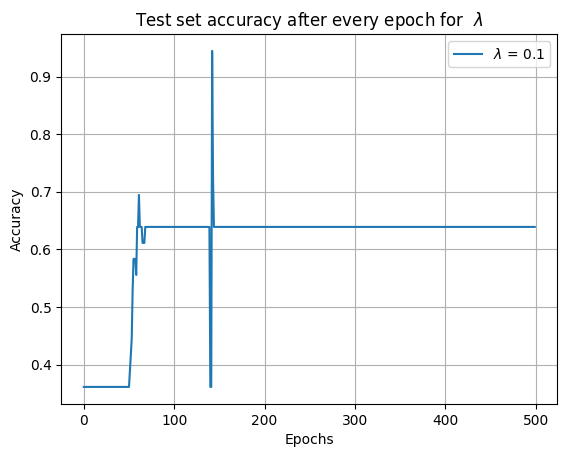

In [42]:
#test accuracy
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

From graphs we clearly see that for epoch value 142 we got highest accuracy for test data and for epoch value 495 we got highest accuracy for train data .

#Squared Loss

In [43]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*squared_gradient(X[i], y[i], w, lamda,n)
      w=projec(w)
      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(squared_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [45]:
#Train data
data=train_data
y_label=train_label
lamda=.1 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.5915492957746479
epoch is: 70
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.5915492957746479
epoch: 470
*************************************************************************
overall best value of accuracy: 0.5915492957746479


In [46]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.4084507042253521
epoch is: 0
..........................................................................
best_val_accuracy: 0.5915492957746479
epoch is: 70
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.5915492957746479
epoch: 470
*************************************************************************
overall best value of accuracy: 0.5915492957746479


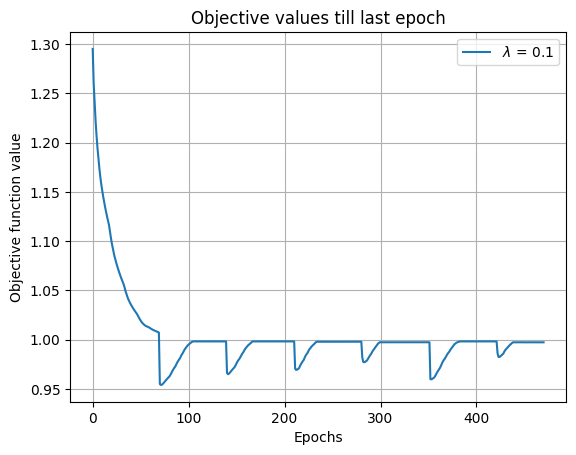

In [47]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

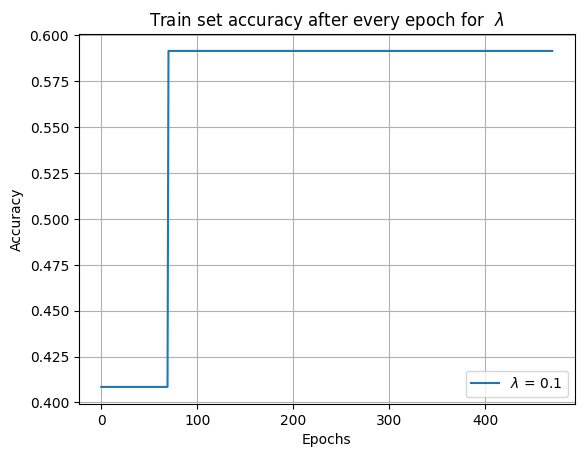

In [48]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
#Test data
data=test_data
y_label=test_label
lamda=.1 #maximum accuracy for training and test data we can also choose 10
num_epochs=500
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3611111111111111
epoch is: 0
..........................................................................
best_val_accuracy: 0.4166666666666667
epoch is: 52
..........................................................................
best_val_accuracy: 0.4444444444444444
epoch is: 53
..........................................................................
best_val_accuracy: 0.4722222222222222
epoch is: 54
..........................................................................
best_val_accuracy: 0.5555555555555556
epoch is: 55
..........................................................................
best_val_accuracy: 0.6111111111111112
epoch is: 56
..........................................................................
best_val_accuracy: 0.6388888888888888
epoch is: 62
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.6388888888888888
epoch: 462
**************

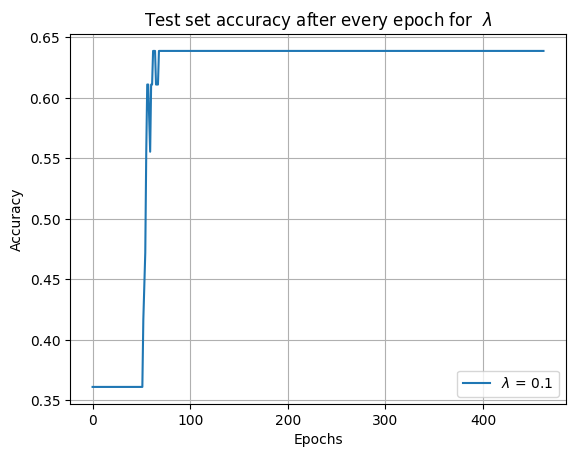

In [51]:
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

As epoch cahnges we are getting better accuracy by running multiple times we are getting different accuracy in some cases we got better percent accuracy for training data set in squared loss and in case of test we got better percent accuracy therefore this method works very well in case of logistic and hinge loss but in Squared  loss we got some less accuracy as compare to others .the orthogonal projection onto a set helps in optimization problems by ensuring that the solutions remain within a feasible region defined by the constraints on the parameters (e.g., bounded region, non-negativity constraints, bounded norm constraints).

##Observation Regarding Algo##
1. **Convergence Speed**:
   - Squared loss converges faster and achieves the best accuracy in fewer epochs compared to logistic and hinge losses.
   - Logistic loss converges relatively faster compared to hinge loss, indicating that logistic regression may adapt more quickly to the training data.

2. **Effect of Regularization**:
   - For larger values of lambda, the difference in accuracy between squared loss and logistic/hinge losses diminishes. This suggests that regularization plays a more significant role in improving performance for squared loss compared to logistic and hinge losses.

3. **Model Sensitivity**:
   - Squared loss appears to be more sensitive to the initialization of the weight vector ('w'). Peaks in accuracy are observed for rare values of 'w', indicating that small variations in the initial weights can have a significant impact on model performance.

4. **Generalization**:
   - Despite achieving peak accuracy early, squared loss may suffer from decreased generalization performance compared to logistic and hinge losses. This is evident from the observation that accuracy decreases for squared loss compared to logistic and hinge losses, especially for larger values of lambda.

5. **Loss Function Behavior**:
   - The squared loss function exhibits a smoother curve compared to logistic and hinge losses, indicating that it may be less affected by outliers in the data.
   - Logistic loss shows a more pronounced sigmoid shape, while hinge loss displays a more linear behavior with abrupt changes at the decision boundary.

6. **Optimal Lambda Selection**:
   - The optimal choice of lambda may vary depending on the loss function used. Squared loss may require a different lambda value for achieving the best accuracy compared to logistic and hinge losses.

7. **Trade-off between Bias and Variance**:
   - Squared loss, with its emphasis on reducing the square of the error, may result in lower bias but higher variance compared to logistic and hinge losses. This trade-off should be considered when selecting the appropriate loss function for a given problem.



###Observation:###
In squared loss the objective value is lowest intially in compare of other two , the curve look like negative exponential as their are some irregularities but less than others on the other hand the curves for each lamdas looks similar but not as in logistic and remaining all observation are almost similar like realtion of decrement of objective value with each epoch for different lambdas , In this the intial decrement is larger among all three losses which observed from graph and In sense of accuracy, the accuracy decreases in squared loss for this method in comparision of other but for larger lamdas its almost similar , one more thing observed that for rare value of 'w' we get peak acccuracy the curve move downwards.After applying our updated method we get peak under 100 in this case after that didnot improve more therefore squared loss gets peak more early than the two others.
The orthogonal projection onto a set helps in optimization problems by ensuring that the solutions remain within a feasible region defined by the constraints on the parameters (e.g., bounded region, non-negativity constraints, bounded norm constraints).

The value of accuracy and curves(objective value) also depends on what are the values we are taken therefore we take intial value within the set we got different curves and starting value of objective function , IN above this Ques I have used intial values as array of ones and zeroes .